In [262]:
import numpy as np
import matplotlib.pyplot as plt

In [263]:
np.random.seed(42)

In [264]:
n = 10
x = np.linspace(0, 5, n)
y = x + np.random.normal(0, 4, n)
z = np.random.normal(0, 3, n)
X = np.array([x, y, z])

In [265]:
class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.explained_variance_ratio_ = None
        
    def fit_transform(self, X):
        X = X - np.mean(X, axis=1).reshape((len(X), 1)) #центрирование
        data = list(zip(*X))
        X = np.cov(X)
        eig_val, eig_vec = np.linalg.eig(X)
        args = np.argsort(np.abs(eig_val))[::-1]
        eig_val, eig_vec = eig_val[args], eig_vec[:, args] #сортировка по убыванию собственных значений
        self.explained_variance_ratio_ = eig_val[:self.n_components] / np.sum(eig_val) #доля дисперсии на каждую новую ось
        
        coords = []
        for i in range(self.n_components):
            coord = []
            vec = eig_vec[:, i]
            for c in data:
                coord.append( np.dot(vec, c) / np.linalg.norm(vec) ) #нахождение проекции на собственные векторы
            coords.append(coord)
        return np.array(coords).T

In [266]:
pca = PCA()
new_coords = pca.fit_transform(X)

In [267]:
pca.explained_variance_ratio_

array([0.6394777 , 0.25482225])

In [268]:
from mpl_toolkits.mplot3d import Axes3D

# Красные линии - исходные векторы, синие - векторы после трансформации матрицей ковариации, зеленые - собственные векторы 

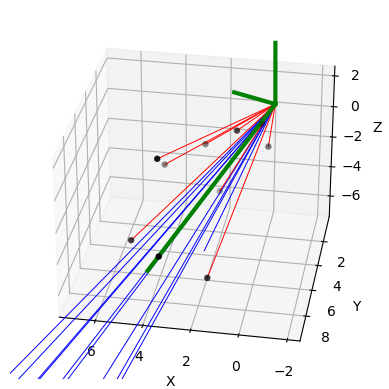

In [269]:
cov_matr = np.cov(X)
val, vec = np.linalg.eig(np.cov(X))
v1 = np.array(list(zip(x, y, z)))
v2 = []

for v in v1:
    v2.append(np.dot(cov_matr, v))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, color="black", linewidth=0.1)
max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0

# Центрируем и масштабируем оси
mid_x = (x.max()+x.min()) * 0.5
mid_y = (y.max()+y.min()) * 0.5
mid_z = (z.max()+z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

for i in range(len(v2)):
    ax.plot([0, v1[i][0]], [0, v1[i][1]], [0, v1[i][2]], color="red", linewidth=0.7)
    ax.plot([0, v2[i][0]], [0, v2[i][1]], [0, v2[i][2]], color="blue", linewidth=0.7)

ax.plot([0, vec[0, 0] * val[0]], [0, vec[1, 0] * val[0]], [0, vec[2, 0] * val[0]], color="green", linewidth=3)
ax.plot([0, vec[0, 1] * val[1]], [0, vec[1, 1] * val[1]], [0, vec[2, 1] * val[1]], color="green", linewidth=3)
ax.plot([0, vec[0, 2] * val[2]], [0, vec[1, 2] * val[2]], [0, vec[2, 2] * val[2]], color="green", linewidth=3)
ax.view_init(30, 100)
plt.show()

# Визуализация самописного PCA

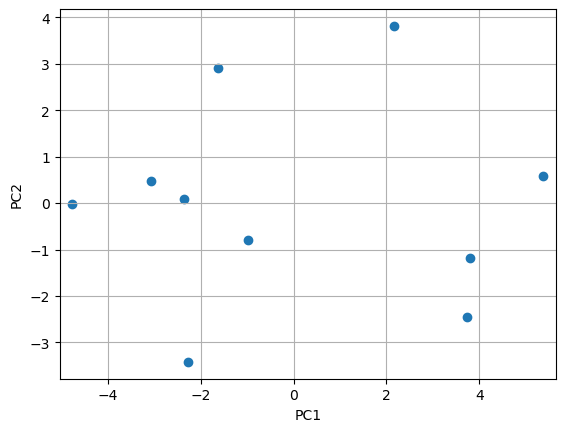

In [285]:
plt.axis('equal')
plt.grid( True )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(new_coords[:, 0], new_coords[:, 1]);

In [271]:
from sklearn.decomposition import PCA

# Визуализация PCA из sklearn

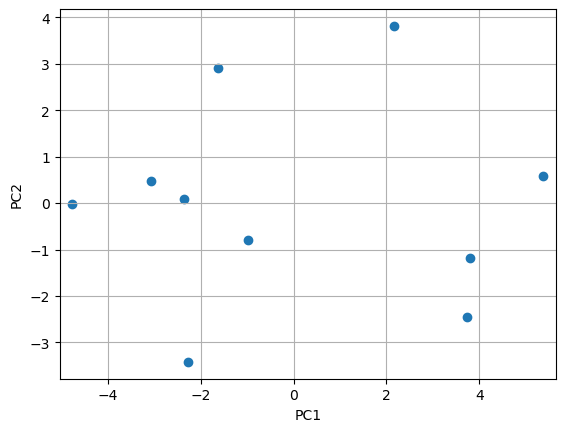

In [286]:
pca = PCA(n_components=2)
new_coord = pca.fit_transform(X.T)
plt.scatter(new_coord[:, 0], new_coord[:, 1])
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid( True )

In [284]:
pca.explained_variance_ratio_

array([0.6394777 , 0.25482225])